<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data analyzing
</div>

**Import necesary libraries**

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

**Read from csv**

In [2]:
df = pd.read_csv("Data/processed_data.csv")
df.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Yes,1,Rarely,Sometimes,29,Male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,1,Sometimes,Sometimes,43,Male,United Kingdom,United Kingdom,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


### Analyzing

+ Câu hỏi: **Sự quan tâm của mọi người về sức khỏe vật lý và sức khỏe tinh thần như thế nào ?**
+ Nguyên nhân: Biết được đáp án sẽ cho chúng ta cái nhìn  tổng quan nhất về tầm ảnh hưởng giữa sức khỏe tâm lý và sức khỏe vật lý đối với mọi người, từ đó có thể đưa ra các biện pháp, phương thức phù hợp nhất để có thể đáp ứng các nhu cầu của công việc có liên quan

**Preprocessing**

In [3]:
future_mh_df = df[['future_mh_specification']]
future_mh_df = future_mh_df['future_mh_specification'].value_counts().reset_index()

future_ph_df = df[['future_ph_specification']]
future_ph_df = future_ph_df['future_ph_specification'].value_counts().reset_index()

future_df = pd.merge(future_ph_df, future_mh_df, on='index', how='inner')
future_df

,index,future_ph_specification,future_mh_specification
0,Maybe,633,438
1,No,441,883
2,Yes,359,112


In [4]:
negative_df = df[['mh_discussion_neg_impact', 'ph_discussion_neg_impact']]
duplicates_df = negative_df[negative_df.duplicated(subset=['mh_discussion_neg_impact', 'ph_discussion_neg_impact'], keep='first')]
combined_count = duplicates_df.groupby(['mh_discussion_neg_impact', 'ph_discussion_neg_impact']).size().reset_index(name='count')
combined_count

,mh_discussion_neg_impact,ph_discussion_neg_impact,count
0,Maybe,Maybe,163
1,Maybe,No,320
2,Maybe,Yes,1
3,No,Maybe,9
4,No,No,427
5,Yes,Maybe,93
6,Yes,No,87
7,Yes,Yes,38


**Visualization**

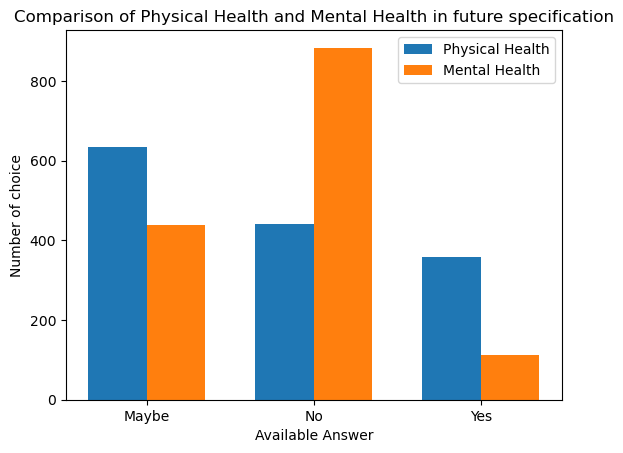

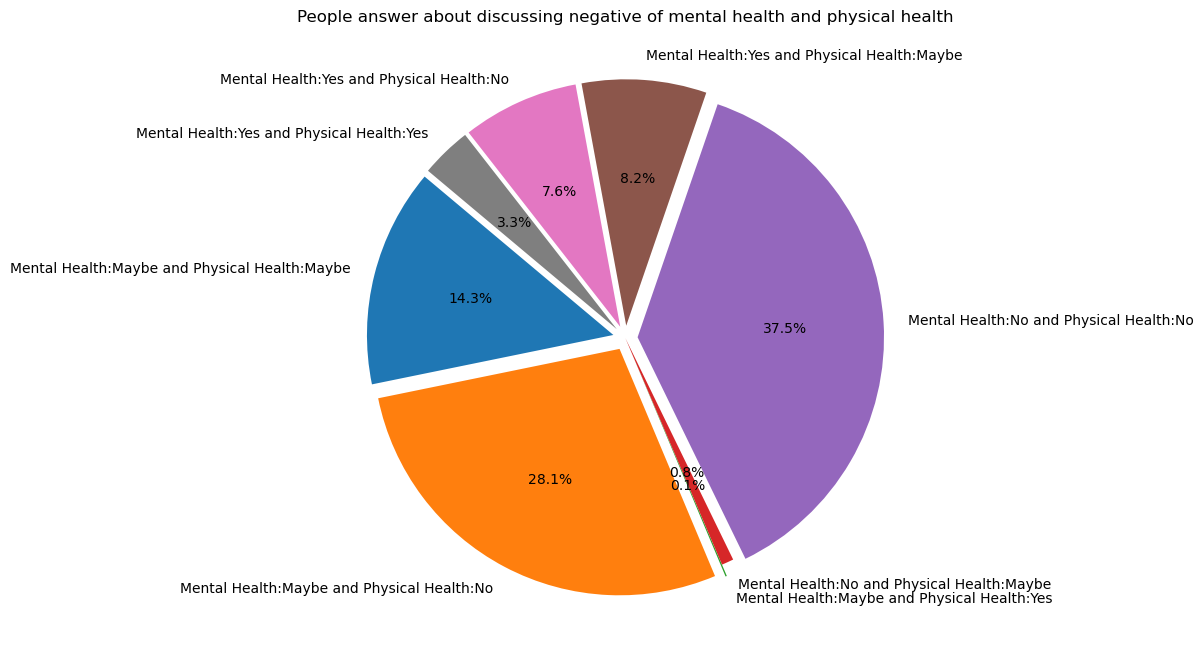

In [5]:
fig, ax = plt.subplots()

bar_width = 0.35
bar_positions1 = range(len(future_df['index']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
ax.bar(bar_positions1, future_df['future_ph_specification'], width=bar_width, label='Physical Health')
ax.bar(bar_positions2, future_df['future_mh_specification'], width=bar_width, label='Mental Health')
ax.set_xlabel('Available Answer')
ax.set_ylabel('Number of choice')
ax.set_title('Comparison of Physical Health and Mental Health in future specification')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(future_df['index'])
ax.legend()

labels = combined_count.apply(lambda x: f"Mental Health:{x['mh_discussion_neg_impact']} and Physical Health:{x['ph_discussion_neg_impact']}", axis=1)
sizes = combined_count['count']
plt.figure(figsize=(8, 8))
plt.pie(sizes,explode=(0.05, 0.05, 0.05, 0, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('People answer about discussing negative of mental health and physical health')

plt.show()

**Conclusion**

+ Nhìn vào biểu đồ cột, ta có thể dễ dàng thấy mọi người có xu hướng `che giấu` các vấn đề về sức khỏe của mình hơn là so với việc có thể nêu rõ ra, đặc biệt là về vấn đề `sức khỏe tâm lý` khi ở giá trị `Yes`, sức khỏe tâm lý được chọn rất thấp, và `áp đảo` so với sức khỏe vật lý ở mục chọn `No`, tuy nhiên vẫn còn rất nhiều lựa chọn là `Maybe` thể hiện sự phân vân khi chọn phải nói ra hay không.
+ Dựa vào biểu đồ tròn, khi được hỏi có thảo luận về ảnh hưởng tiêu cực của các vấn đề sức khỏe không, thì số lượng `không quan tâm` về ảnh hưởng tiêu cực ở cả `sức khỏe tâm lý và sức khỏe vật lý` chiếm phần lớn trong khảo sát (37.5%). Thế nhưng ngược lại với việc chỉ ra vấn đề về sức khỏe ở trên, chiếm nhiều thứ 2 là `Có lẽ sẽ có bàn luận` về ảnh hưởng tiêu cực của `sức khỏe tâm lý` và `không thảo luận` về `sức khỏe vật lý` với 28.1%. Cũng như chiếm ít nhất là số lượng "`Có lẽ sẽ có bàn luận` về ảnh hưởng tiêu cực của `sức khỏe tâm lý` và `có thảo luận` về `sức khỏe vật lý`" với 0.1%. 
+ Khi đó ta sẽ thấy mọi người thường có xu hướng quan tâm đến hậu quả của sức khỏe tâm lý hơn so với vật lý, nhưng lại có xu hướng giấu đi các vấn đề về sức khỏe tâm lý hơn so với vấn đề về sức khỏe vật lý

### Câu hỏi
+ Câu hỏi: **Cảm nhận của mọi người về việc chia sẻ sức khỏe tinh thần trong cuộc sống hằng ngày**
+ Nguyên nhân: Biết được vấn đề này, ta có thể tìm ra căn nguyên dẫn tới việc mọi người ngại chia sẻ các vấn đề liên quan tới tâm lý, từ đó có thể tìm cách khác phục, giúp họ cởi mở hơn, thúc đẩy giảm thiểu những tác hại của sức khỏe tinh thần gây ra

**Preprocessing**

In [6]:
cowork_df = df[['mh_discussion_cowork']]
cowork_df = cowork_df['mh_discussion_cowork'].value_counts().reset_index()

supervisor_df = df[['mh_discussion_supervisor']]
supervisor_df = supervisor_df['mh_discussion_supervisor'].value_counts().reset_index()

sharing_df = pd.merge(cowork_df, supervisor_df, on='index', how='inner')
sharing_df

,index,mh_discussion_cowork,mh_discussion_supervisor
0,Maybe,479,382
1,No,392,336
2,Yes,275,428


In [7]:
reason_df = df[['mh_sharing_friends/fam_flag', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_bad_response_workplace']]
friendfam_df = reason_df['mh_sharing_friends/fam_flag'].value_counts().reset_index()
hurt_career_df = reason_df['mh_hurt_on_career'].value_counts().reset_index()
neg_view_df = reason_df['mh_neg_view_cowork'].value_counts().reset_index()
bad_responses_df = reason_df['mh_bad_response_workplace'].value_counts().reset_index()
bad_responses_df

,index,mh_bad_response_workplace
0,No,567
1,Maybe/Not sure,346
2,"Yes, I observed",264
3,"Yes, I experienced",167


**Visualize**

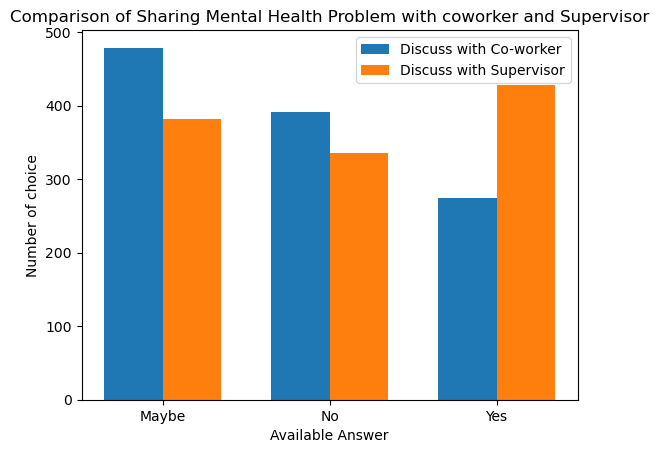

In [8]:
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions1 = range(len(sharing_df['index']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
ax.bar(bar_positions1, sharing_df['mh_discussion_cowork'], width=bar_width, label='Discuss with Co-worker')
ax.bar(bar_positions2, sharing_df['mh_discussion_supervisor'], width=bar_width, label='Discuss with Supervisor')
ax.set_xlabel('Available Answer')
ax.set_ylabel('Number of choice')
ax.set_title('Comparison of Sharing Mental Health Problem with coworker and Supervisor')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(future_df['index'])
ax.legend()
plt.show()

Text(0.5, 1.0, 'MH Bad responses from workplace')

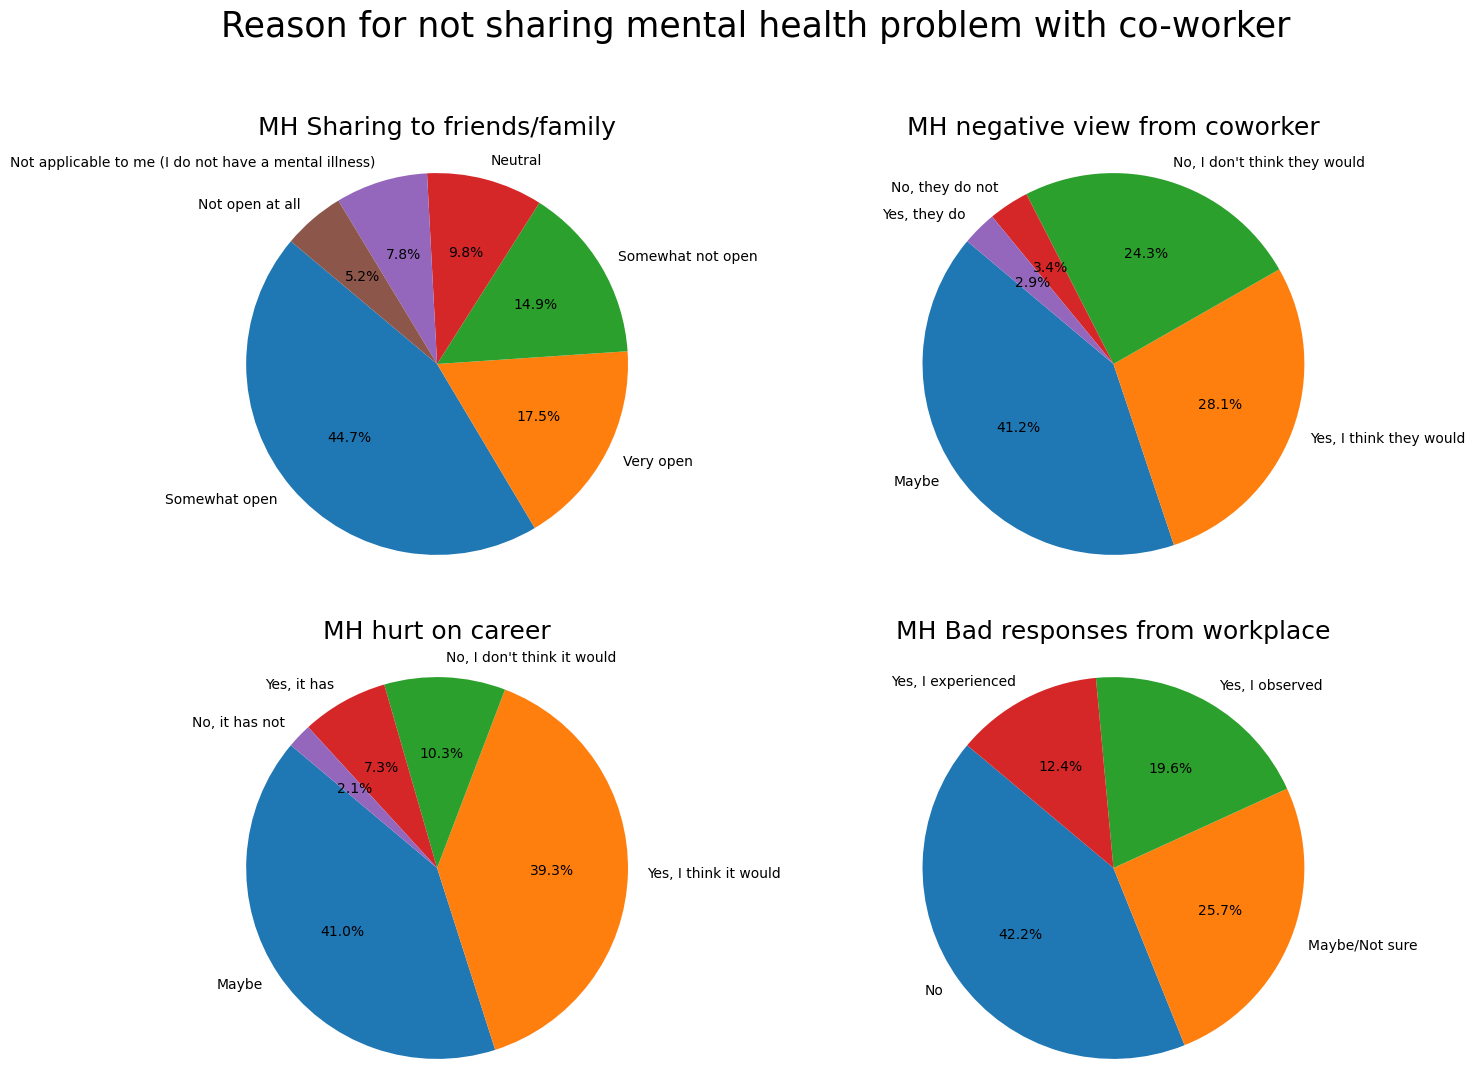

In [9]:
fig, axe = plt.subplots(figsize = (16, 12), ncols=2, nrows=2)
plt.suptitle('Reason for not sharing mental health problem with co-worker', fontsize = 25, y = 1)

axe[0][0].pie(friendfam_df['mh_sharing_friends/fam_flag'], labels=friendfam_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[0][0].axis('equal')
axe[0][0].set_title('MH Sharing to friends/family', pad = 14, fontsize = 18)

axe[0][1].pie(neg_view_df['mh_neg_view_cowork'],labels = neg_view_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[0][1].axis('equal')
axe[0][1].set_title('MH negative view from coworker', pad = 14, fontsize = 18)

axe[1][0].pie(hurt_career_df['mh_hurt_on_career'],labels = hurt_career_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[1][0].axis('equal')
axe[1][0].set_title('MH hurt on career', pad = 14, fontsize = 18)

axe[1][1].pie(bad_responses_df['mh_bad_response_workplace'],labels = bad_responses_df['index'], autopct='%1.1f%%', shadow=False, startangle=140)
axe[1][1].axis('equal')
axe[1][1].set_title('MH Bad responses from workplace', pad = 14, fontsize = 18)


**Conclusion**

+ Dựa vào biểu đồ 1, chúng ta có thể thấy người ta có xu hướng `chia sẻ với cố vấn, người có chuyên môn` nhiều hơn là `chia sẻ với đồng nghiệp của mình`. Số lượng người `phân vân` có nên chia sẻ với đồng nghiệp và không chia sẻ với đồng nghiệp `cao hơn` so với việc `chia sẻ` với đồng nghiệp. Trong khi đó, việc `chia sẻ với cố vấn` hoàn toàn `cao hơn` so với `không chia sẻ` với cố vấn hoặc `phân vân` có nên chia sẻ với cố vấn hay không
+ Theo biểu đồ tròn đầu tiên, mọi người cũng có xu hướng `chia sẻ` vấn đề về sức khỏe tinh thần của mình `cho gia đình` ở nhiều mức độ khác nhau.
+ Dựa vào các biểu đồ tròn còn lại, ta có thể dễ dàng thấy `nguyên nhân` vì sao mọi người thường không thích chia sẻ các vấn đề sức khỏe cho đồng nghiệp mình hơn. Các lựa chọn cho rằng những lí do đưa trên `không ảnh hưởng đến công việc` của họ chưa bao giờ `chiếm quá nửa` số lượt chọn. Trong khi đó chiếm phần lớn là `sự phân vân` rằng việc đó có ảnh hưởng hay không, hay là những lựa chọn chắc chắn rằng việc đó có ảnh hưởng đến công việc. Ở đây ta gom chung những `người tán thành` và `phân vân` vào `chung một nhóm` để so sánh với các lựa chọn phủ nhận vì nếu họ phân vân có nghĩa là họ vẫn cho rằng `có thể nó sẽ có ảnh hưởng` ở một mức độ nào đó nhưng vì không quá chắc chắn với đáp án của mình.